# **Temperature Forecast**

## **1. Dataset loading**

In [26]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [18]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")

In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


## **2.Data study**

In [5]:
df.shape

(7752, 25)

In [4]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [19]:
df=df.dropna()

In [12]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [11]:
df.shape

(7588, 25)

In [20]:
df = df.drop(['Date'],axis=1)

In [21]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Present_Tmax      7588 non-null   float64
 2   Present_Tmin      7588 non-null   float64
 3   LDAPS_RHmin       7588 non-null   float64
 4   LDAPS_RHmax       7588 non-null   float64
 5   LDAPS_Tmax_lapse  7588 non-null   float64
 6   LDAPS_Tmin_lapse  7588 non-null   float64
 7   LDAPS_WS          7588 non-null   float64
 8   LDAPS_LH          7588 non-null   float64
 9   LDAPS_CC1         7588 non-null   float64
 10  LDAPS_CC2         7588 non-null   float64
 11  LDAPS_CC3         7588 non-null   float64
 12  LDAPS_CC4         7588 non-null   float64
 13  LDAPS_PPT1        7588 non-null   float64
 14  LDAPS_PPT2        7588 non-null   float64
 15  LDAPS_PPT3        7588 non-null   float64
 16  LDAPS_PPT4        7588 non-null   float64


## **3.EDA**

**Univariant analysis**

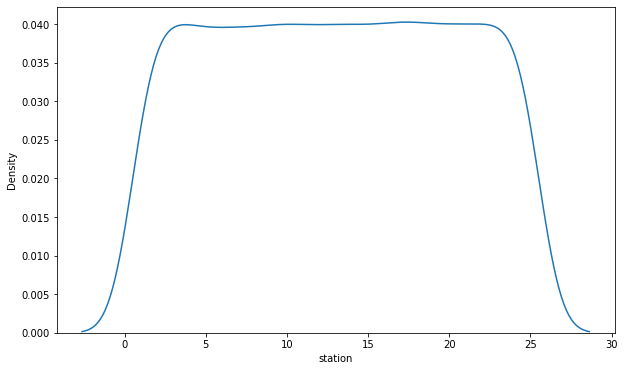

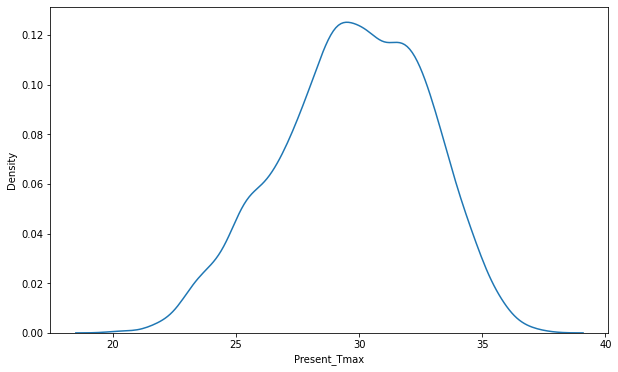

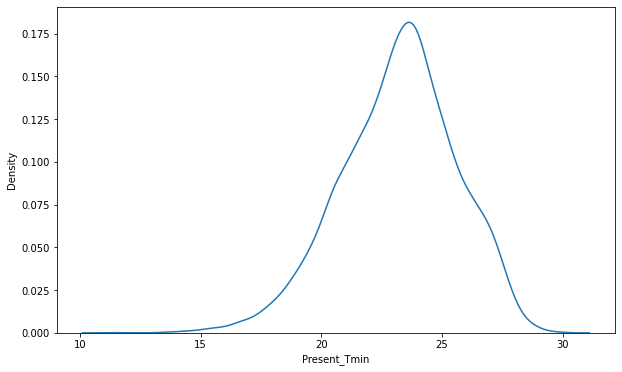

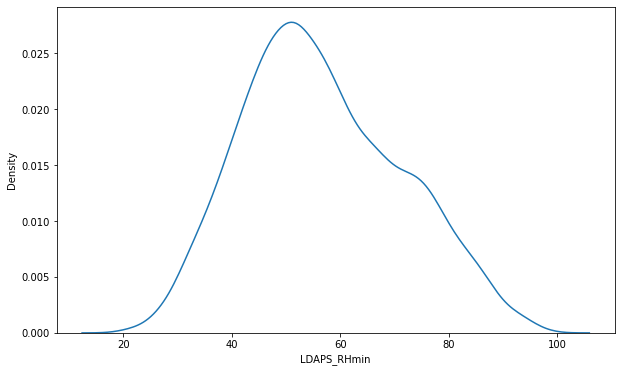

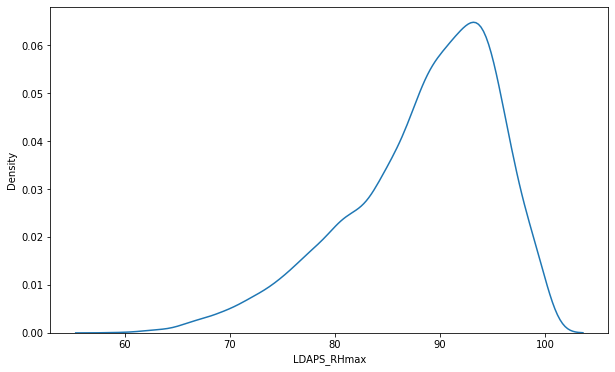

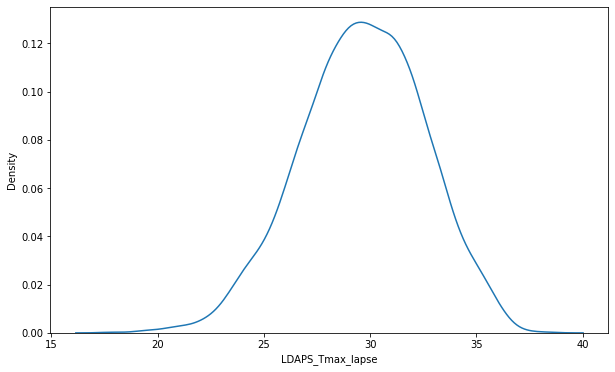

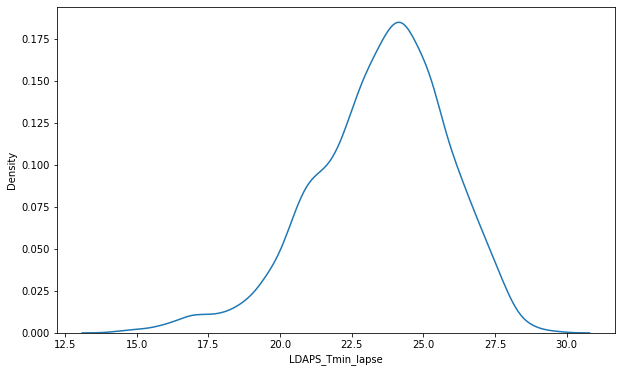

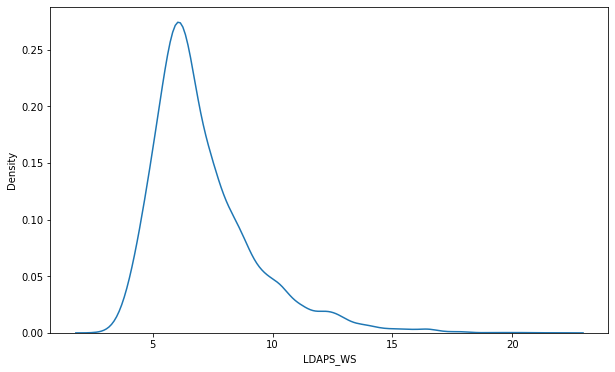

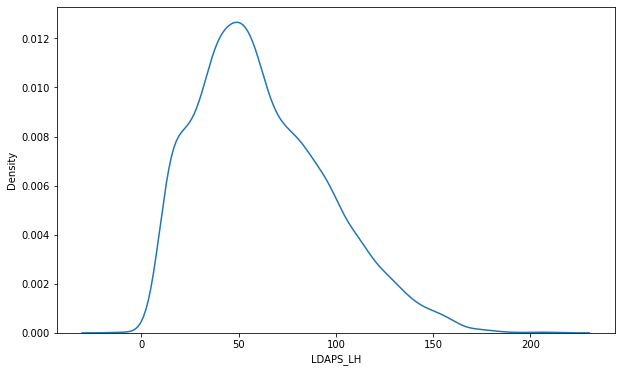

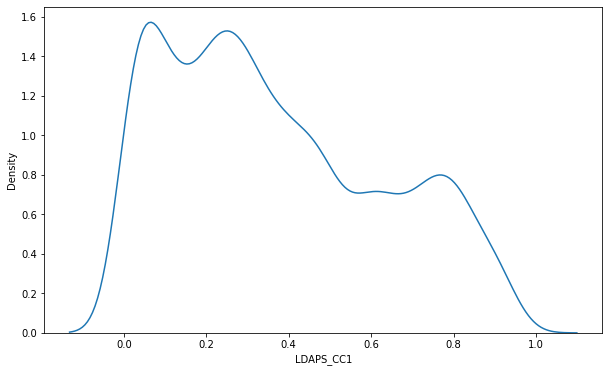

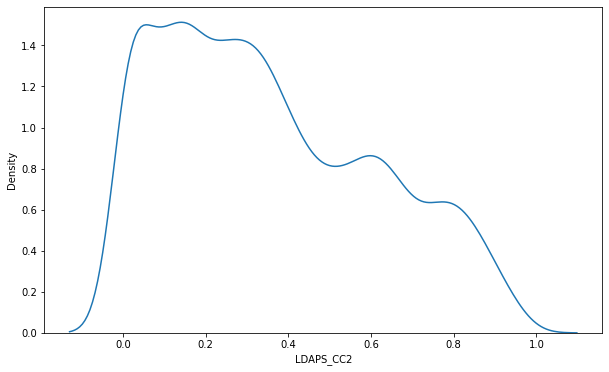

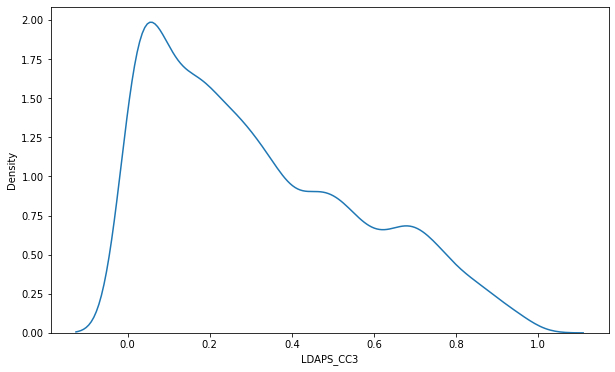

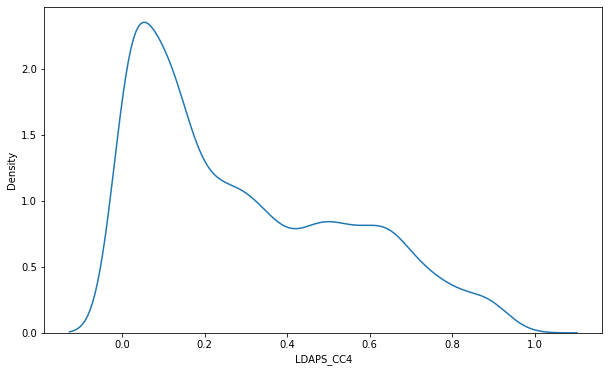

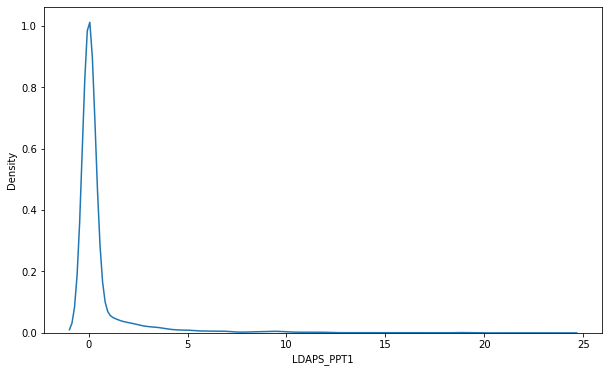

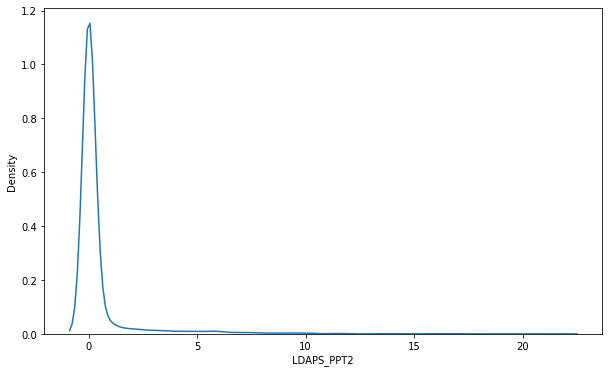

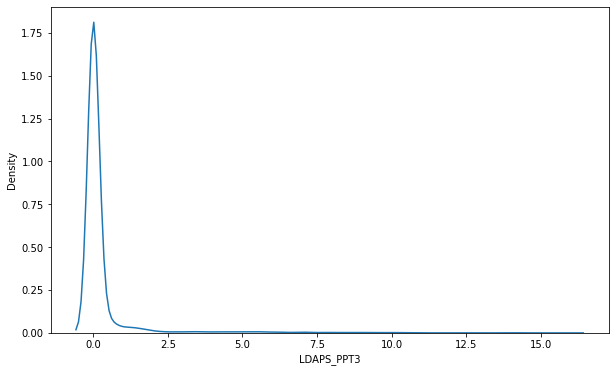

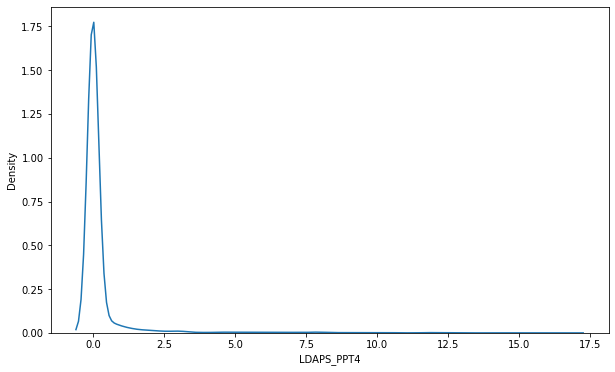

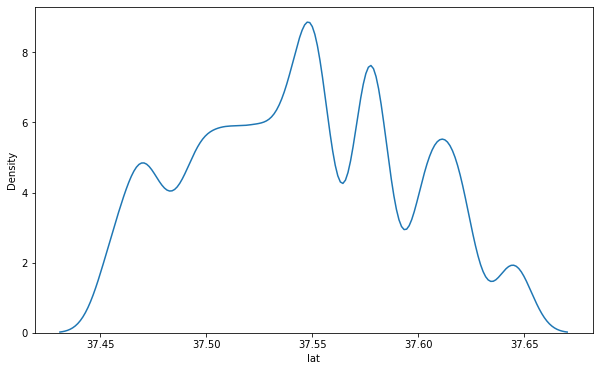

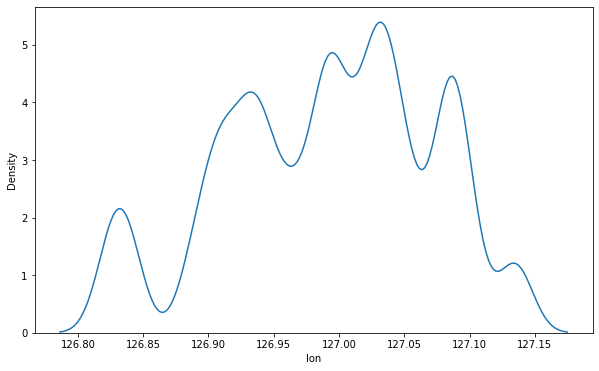

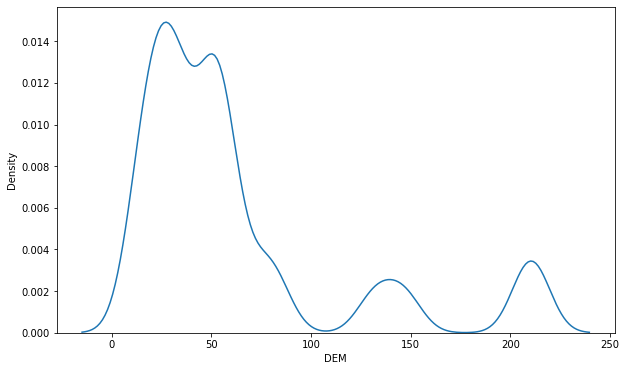

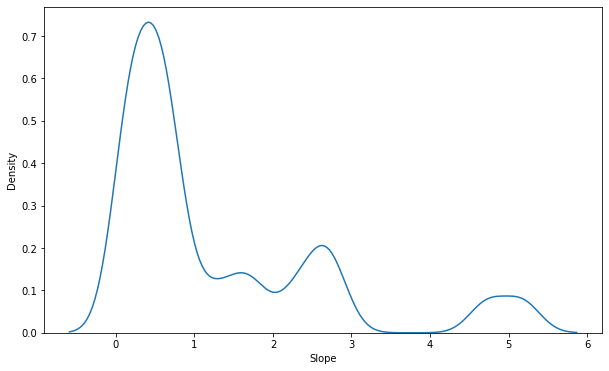

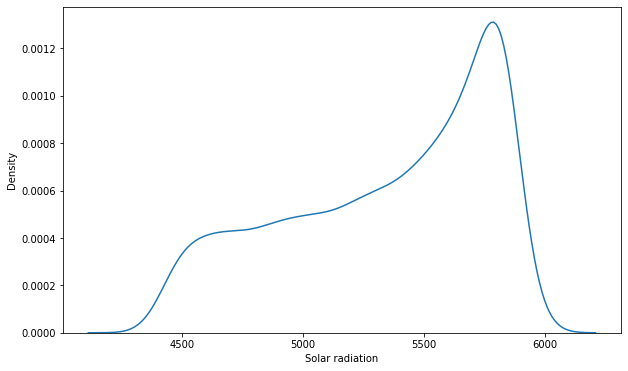

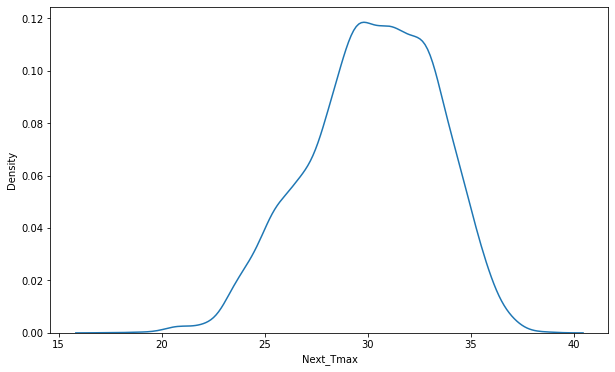

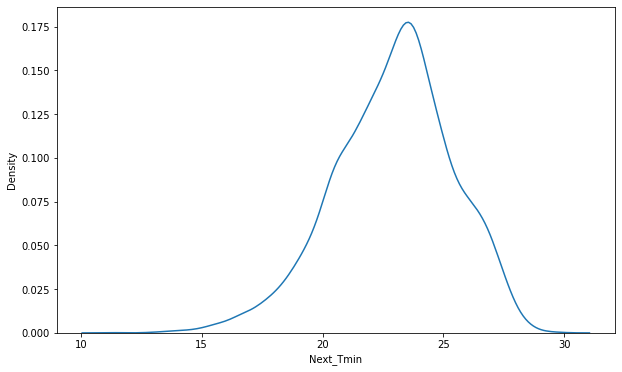

In [24]:
for i in df.columns:
  plt.figure(figsize=[10,6])
  sns.kdeplot(df[i])

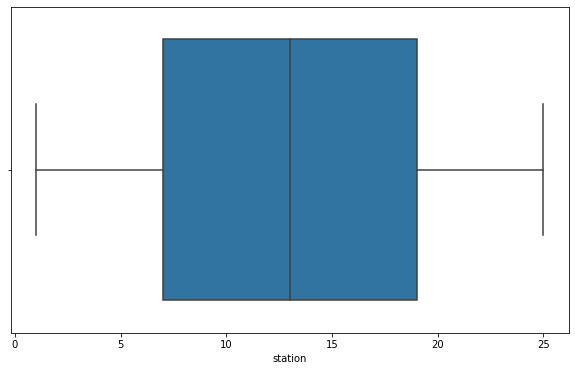

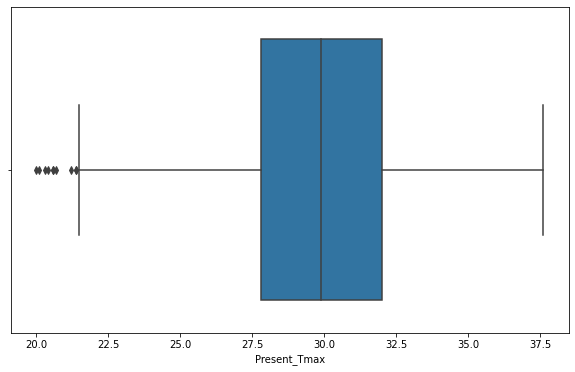

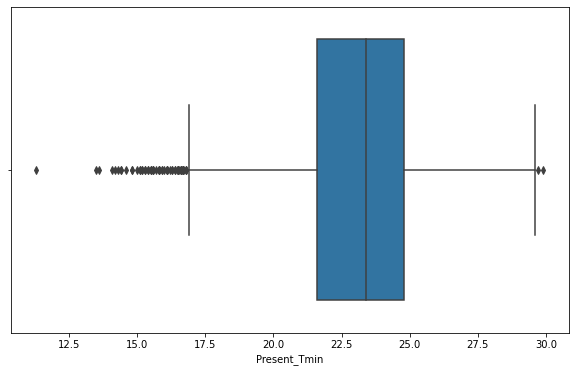

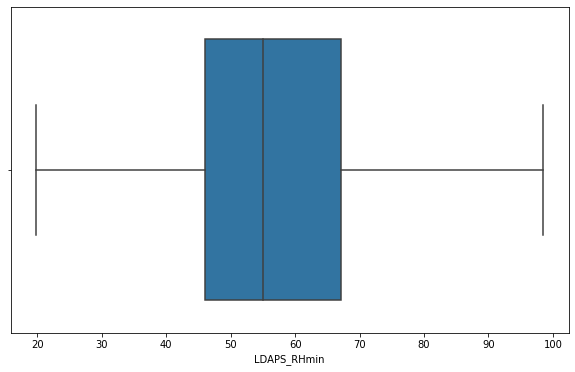

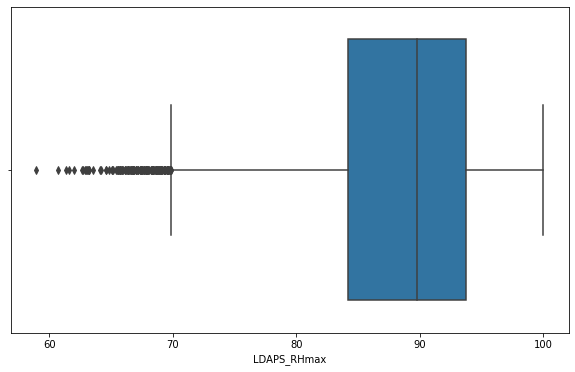

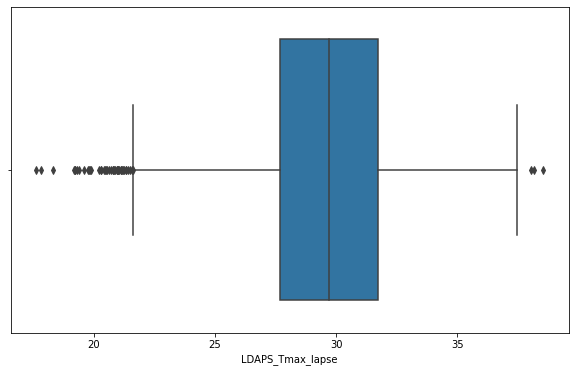

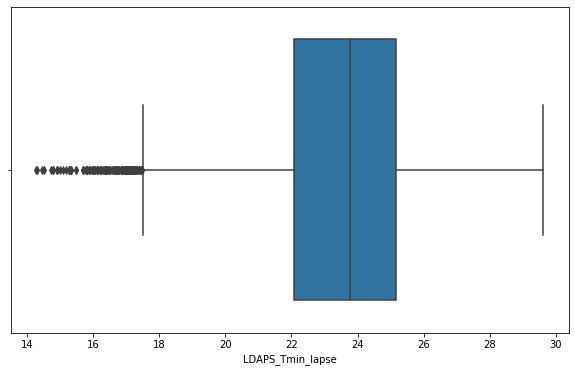

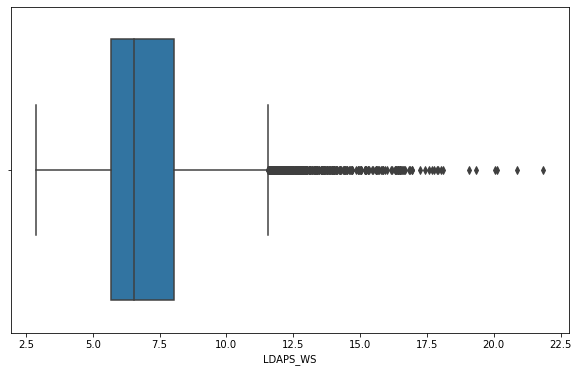

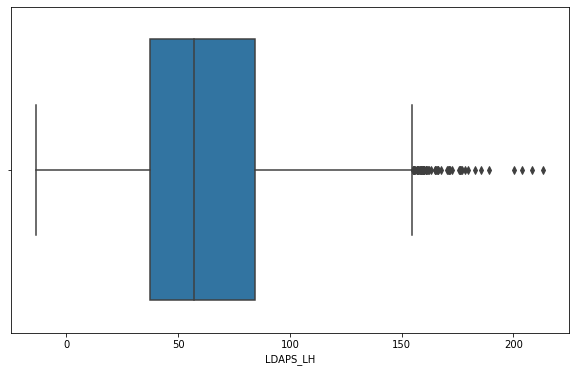

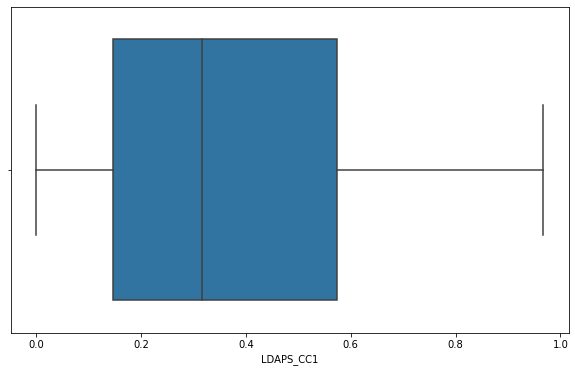

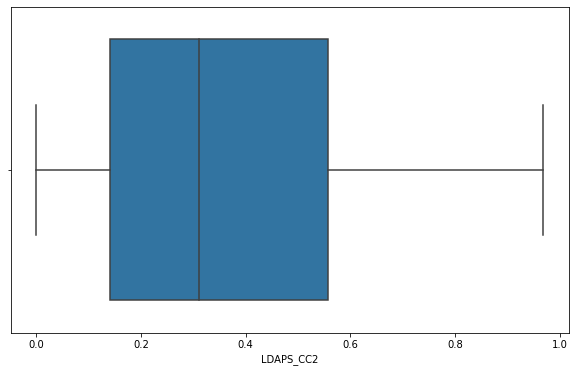

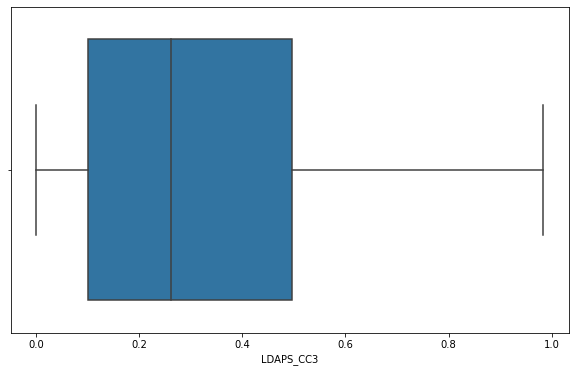

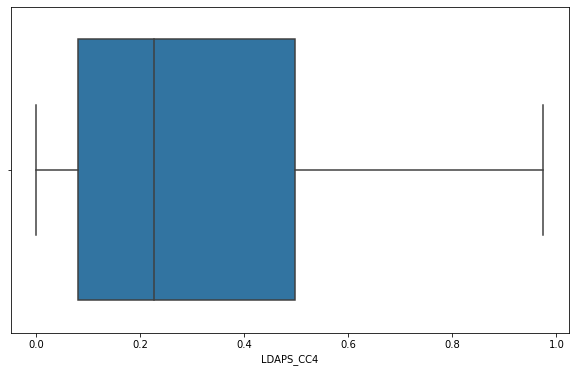

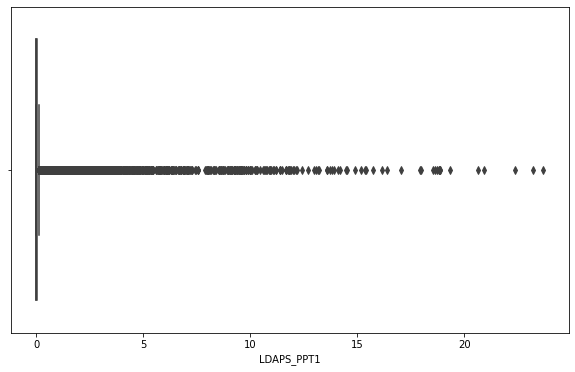

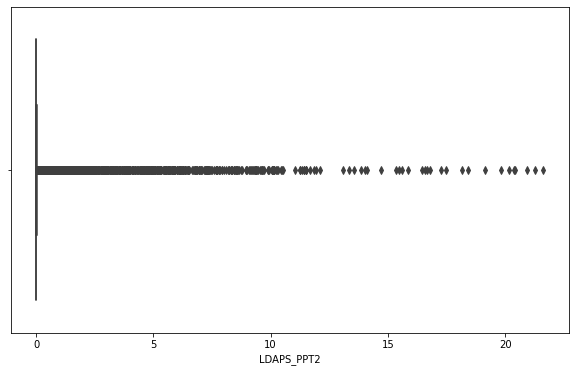

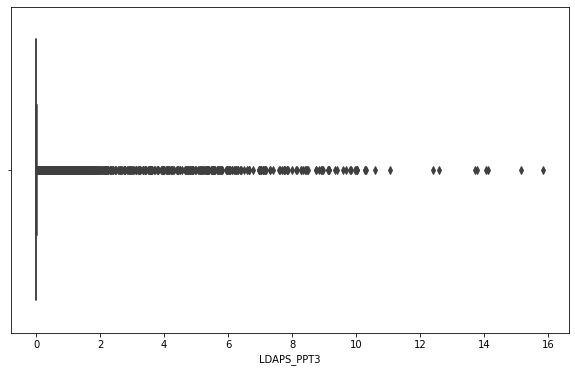

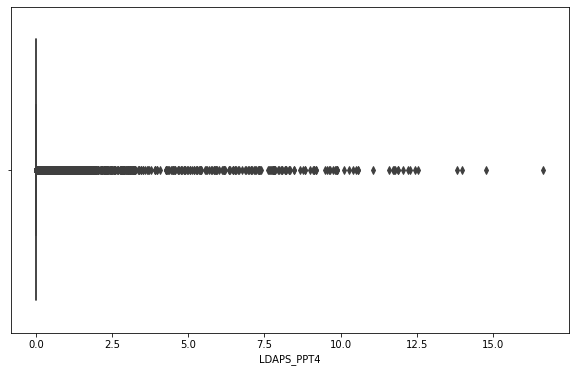

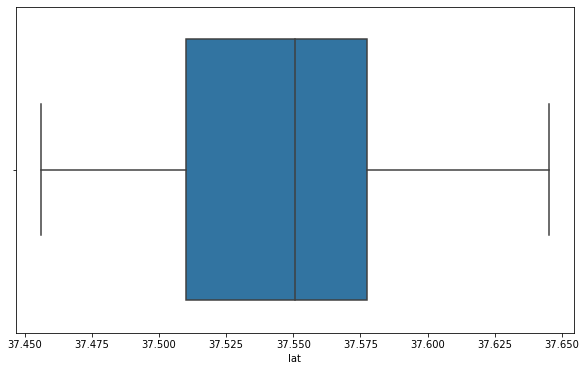

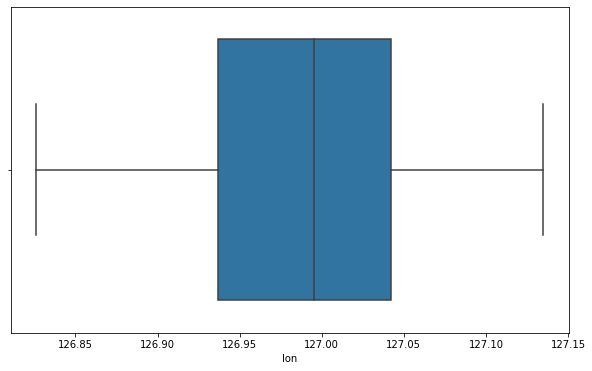

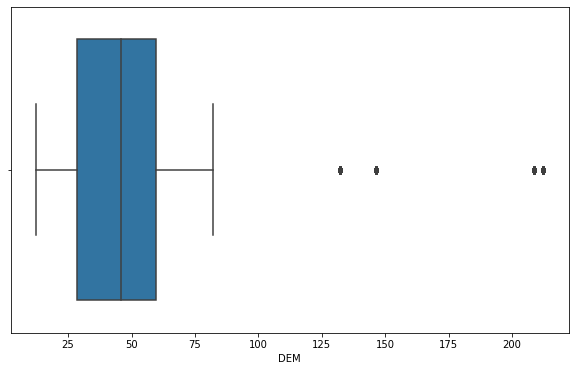

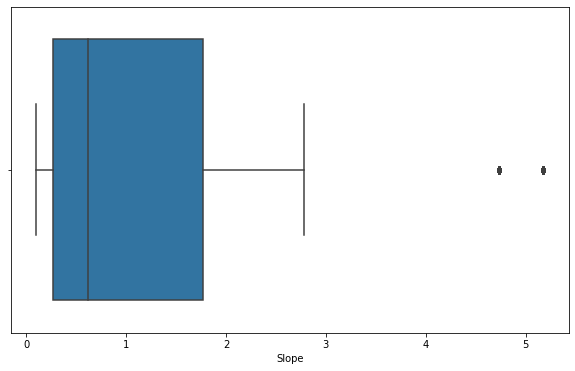

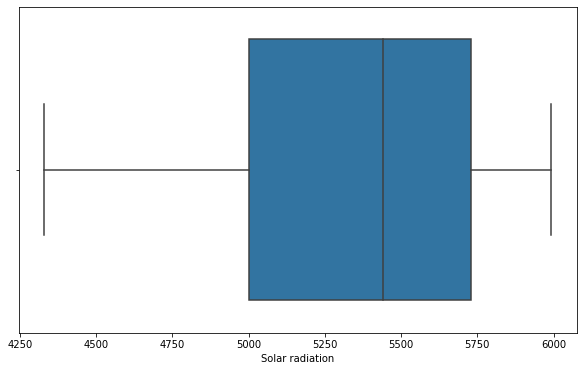

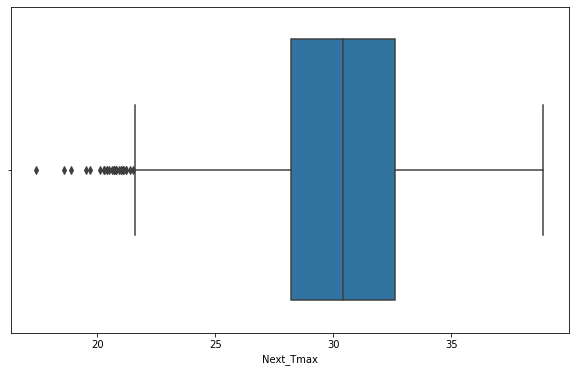

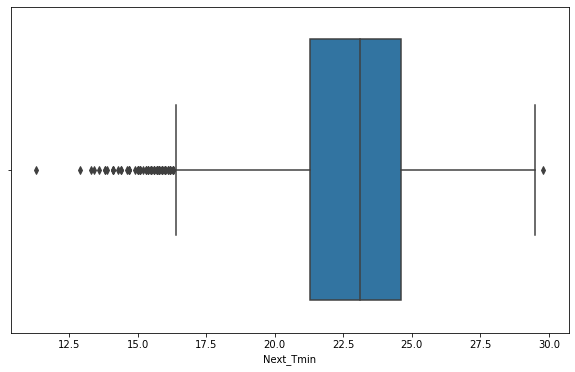

In [25]:
for i in df.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(df[i])

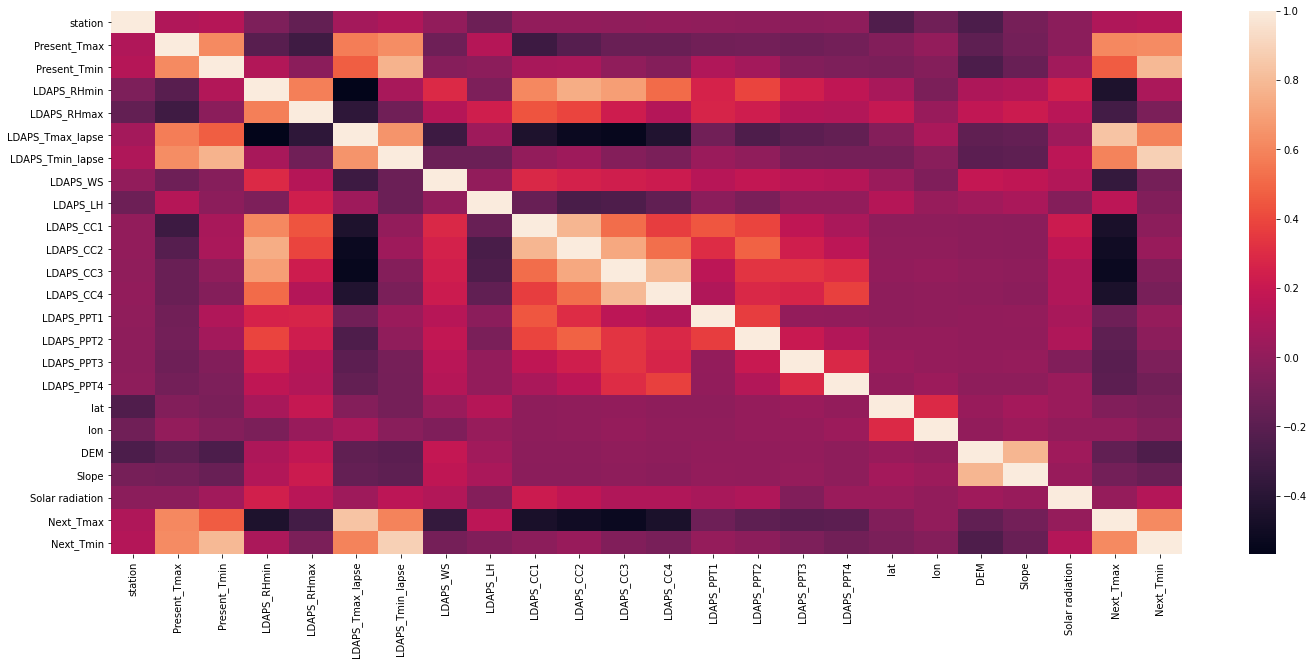

In [27]:
df_corr=df.corr()
plt.figure(figsize=[24,10])
sns.heatmap(df_corr)

## **4. Data pre-processing**

**Null Value**

In [28]:
print(df.isnull().sum())

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64


**Skewness removal**

In [29]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

In [32]:
df1 = np.cbrt(df)

df1.head(15)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.000000,3.061686,2.776331,3.876556,4.499858,3.039265,2.844153,1.896289,4.110499,0.616178,0.588576,0.544796,0.507783,0.0,0.0,0.0,0.0,3.350274,5.026407,5.965871,1.406938,18.164032,3.075844,2.767655
1,1.259921,3.171492,2.784953,3.738803,4.491419,3.102069,2.885901,1.785468,3.731014,0.608678,0.631445,0.542254,0.503610,0.0,0.0,0.0,0.0,3.350274,5.026948,3.550622,0.801092,18.038306,3.124400,2.823108
2,1.442250,3.161518,2.856178,3.651584,4.379060,3.110381,2.906984,1.830969,2.740099,0.593772,0.636173,0.588764,0.521864,0.0,0.0,0.0,0.0,3.349472,5.027291,3.217444,0.643203,18.032406,3.144755,2.880487
3,1.587401,3.174802,2.860259,3.876204,4.586534,3.097001,2.857247,1.781083,4.035663,0.600344,0.609122,0.544189,0.512039,0.0,0.0,0.0,0.0,3.351473,5.026816,3.575659,1.363477,18.025647,3.164850,2.896468
4,1.709976,3.154834,2.797787,3.829823,4.483978,3.076335,2.863778,1.789965,4.761697,0.532985,0.629957,0.563461,0.553989,0.0,0.0,0.0,0.0,3.348673,5.028306,3.272250,0.796600,18.028301,3.148122,2.823108
5,1.817121,3.171492,2.864327,3.742941,4.402121,3.080043,2.877375,1.835340,3.689706,0.570088,0.654850,0.615205,0.527000,0.0,0.0,0.0,0.0,3.347468,5.027080,3.794600,0.526203,18.042882,3.158180,2.884499
6,1.912931,3.154834,2.900436,3.832391,4.327101,3.056409,2.894021,1.774447,5.001466,0.730365,0.693525,0.646665,0.526209,0.0,0.0,0.0,0.0,3.349472,5.024388,2.312721,0.461826,18.017712,3.137999,2.860259
7,2.000000,3.178106,2.868384,3.740300,4.272742,3.067081,2.877232,1.827601,3.476345,0.709964,0.701309,0.648230,0.523955,0.0,0.0,0.0,0.0,3.346263,5.025338,3.744864,1.160496,18.032854,3.144755,2.839739
8,2.080084,3.154834,2.802039,3.810745,4.322910,3.051946,2.857500,1.818849,4.398742,0.742150,0.701223,0.642299,0.530040,0.0,0.0,0.0,0.0,3.347067,5.024229,3.706761,0.744403,18.046077,3.151482,2.784953
9,2.154435,3.161518,2.736852,3.840635,4.428493,3.021209,2.824238,1.868057,3.979185,0.703582,0.674053,0.625949,0.513554,0.0,0.0,0.0,0.0,3.345861,5.025932,5.929802,1.730054,18.063161,3.124400,2.758924


In [33]:
df1.skew()

station            -0.688963
Present_Tmax       -0.414535
Present_Tmin       -0.588928
LDAPS_RHmin        -0.081662
LDAPS_RHmax        -0.989682
LDAPS_Tmax_lapse   -0.425193
LDAPS_Tmin_lapse   -0.813885
LDAPS_WS            0.877761
LDAPS_LH           -0.348066
LDAPS_CC1          -0.709385
LDAPS_CC2          -0.754487
LDAPS_CC3          -0.559701
LDAPS_CC4          -0.458425
LDAPS_PPT1          1.955868
LDAPS_PPT2          2.267487
LDAPS_PPT3          2.575795
LDAPS_PPT4          2.837790
lat                 0.083869
lon                -0.289853
DEM                 0.919265
Slope               0.612855
Solar radiation    -0.588081
Next_Tmax          -0.513874
Next_Tmin          -0.643173
dtype: float64

In [34]:
df=df1

**Outlier Removal**

In [36]:
from scipy import stats
import numpy as np
print("Old Shape: ", df.shape)   
z = np.abs(stats.zscore(df))
print(z)

Old Shape:  (7588, 24)
[[2.36205388 0.31886378 0.71767512 ... 1.45609307 0.33013981 0.65409413]
 [1.86741368 0.73176685 0.63181704 ... 1.19230852 0.11605429 0.12597467]
 [1.52043517 0.63634133 0.07742609 ... 1.17993087 0.30310269 0.42048887]
 ...
 [1.14689908 2.28517936 2.70940892 ... 2.16104707 0.5915645  2.00712244]
 [1.22422371 2.28517936 2.41280009 ... 2.17383573 0.49295981 1.68883856]
 [1.29942919 2.32433152 2.56025213 ... 2.14027782 0.7574659  2.33372204]]


In [37]:
threshold = 3
print(np.where(z > 3))

(array([  25,   25,   26, ..., 7581, 7582, 7582]), array([ 7, 14, 14, ...,  2,  2,  6]))


In [38]:
after_zscore = df[(z < 3).all(axis=1)]

In [39]:
after_zscore.shape

(6535, 24)

In [42]:
(7588-6535)/7588*100

13.877174486030574

since we loose morethan 13% of data this methord is not suggested.

## **5.Feature Engineering**

### train_test_split

In [52]:
x=df.drop(["Next_Tmax","Next_Tmin"],axis=1)
y=df["Next_Tmax"]

In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

### Scaling

In [54]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [55]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

In [56]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
count,6070.000000,6070.000000,6070.000000,6070.000000,6070.000000,6070.000000,6070.000000,6070.000000,6070.000000,6070.000000,6070.000000,6070.000000,6070.000000,6070.000000,6070.000000,6070.000000,6070.000000,6070.000000,6070.000000,6070.000000,6070.000000,6070.000000
mean,0.643826,0.596644,0.645877,0.579653,0.745453,0.628898,0.651173,0.349618,0.747649,0.665445,0.651156,0.618720,0.595122,0.104848,0.090331,0.078769,0.068658,0.468433,0.534695,0.376687,0.384779,0.626728
std,0.274449,0.166605,0.139638,0.174357,0.165325,0.135236,0.147058,0.132367,0.091260,0.215683,0.225076,0.224071,0.238894,0.187433,0.178007,0.162057,0.158887,0.266789,0.257475,0.266763,0.281020,0.256319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.474492,0.489661,0.558829,0.458417,0.655805,0.542610,0.566577,0.261140,0.689228,0.532846,0.523646,0.467728,0.436527,0.000000,0.000000,0.000000,0.000000,0.286359,0.359410,0.205019,0.146298,0.425174
50%,0.702350,0.612469,0.663033,0.573713,0.782120,0.637968,0.670870,0.325433,0.750418,0.686918,0.683613,0.643328,0.617261,0.000000,0.000000,0.000000,0.000000,0.500949,0.547127,0.345712,0.307482,0.689934
75%,0.867145,0.724194,0.740441,0.710509,0.868534,0.726987,0.754112,0.420741,0.814348,0.840706,0.832911,0.796448,0.799410,0.130875,0.091747,0.079928,0.021142,0.643393,0.699200,0.437567,0.589261,0.855509
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **6 a. Model Construction for "Next_Tmax"**

### 1)FINDING BEST RANDOM STATE

In [72]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [57]:
#FINDING BEST RANDOM STATE

from sklearn.metrics import r2_score
d=5
lm = LinearRegression(fit_intercept=True, normalize=True)
for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
  lm.fit(x_train,y_train)
  pred_train=lm.predict(x_train)
  pred_test = lm.predict(x_test)
  a=r2_score(y_train,pred_train)
  b=r2_score(y_test,pred_test)
  c=a-b
  print(i,c)
  if d>=c:
    d=c
    print("least value",i,d)

0 -0.010576704836148032
least value 0 -0.010576704836148032
1 -0.007626036591401486
2 0.00020938055706420933
3 -0.02450622561661253
least value 3 -0.02450622561661253
4 0.02208971207244448
5 -0.013908170779668771
6 0.008802974616136439
7 -0.009156949397150727
8 -0.005297354893190498
9 0.004492572075232348
10 0.00024903118200558794
11 -0.004327462014593331
12 0.007874936302125657
13 0.011980580440326793
14 -0.011182117926961554
15 0.02917778149506911
16 -0.009717050433228347
17 -0.003896432085138679
18 0.00401967847420992
19 0.01758850277892665
20 -0.01242511197579177
21 -0.016676342884553552
22 -0.0075663383062297696
23 -0.0005655638351702574
24 -0.009486719779023933
25 -0.0025331351336704833
26 0.023863857599657923
27 0.009252905796302446
28 -0.004865930076467073
29 -0.006870462387708498
30 -0.04119211008046697
least value 30 -0.04119211008046697
31 0.015577111353948347
32 0.00959254416545241
33 0.007483455120828708
34 -0.0036558192444349213
35 -0.0083797531755746
36 0.020706199558836

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=30)

**LinearRegression**

In [70]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.7632958127608602


In [73]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,LR_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,LR_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,LR_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,LR_predict))
print('r2_score:',r2_score(y_test,LR_predict))

Mean Absolute Error:  0.037512350346678665
Mean Squared Error:  0.00237710734842041
Root Mean Squared Error:  0.04875558786867829
Explained Variance Score:  0.8044960704115918
r2_score: 0.8044879228413272


**RandomForestRegressor**

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predictions1=rf.predict(x_test)
print(rf.score(x_train,y_train))

0.9865106075237382


In [77]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

Mean Absolute Error:  0.02437667731867152
Mean Squared Error:  0.0010420899439678906
Root Mean Squared Error:  0.03228141793614231
Explained Variance Score:  0.9142986069166208
r2_score: 0.9142902950231871


**SVR**

In [78]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.6965383564580984


In [79]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,svr_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,svr_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,svr_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,svr_predict))
print('r2_score:',r2_score(y_test,svr_predict))

Mean Absolute Error:  0.045988576735530036
Mean Squared Error:  0.0032669496417893147
Root Mean Squared Error:  0.05715723612797696
Explained Variance Score:  0.739013412984157
r2_score: 0.7313002667450226


**DecisionTreeRegressor**

In [86]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [81]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_PRED))
print('r2_score:',r2_score(y_test,DTR_PRED))

Mean Absolute Error:  0.036510536156805065
Mean Squared Error:  0.0026744471924166945
Root Mean Squared Error:  0.051715057695188686
Explained Variance Score:  0.780044713018951
r2_score: 0.7800323463776142


**GradientBoostingRegressor**

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.86987553478936


In [83]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_PRED))
print('r2_score:',r2_score(y_test,GBR_PRED))

Mean Absolute Error:  0.031178436539289166
Mean Squared Error:  0.0015666297497061335
Root Mean Squared Error:  0.03958067394204062
Explained Variance Score:  0.8711495295818854
r2_score: 0.8711479998128182


**Ridge**

In [84]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.761238531440091


In [85]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,R_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,R_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,R_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,R_predict))
print('r2_score:',r2_score(y_test,R_predict))

Mean Absolute Error:  0.037835770203480515
Mean Squared Error:  0.00242034618971975
Root Mean Squared Error:  0.04919701403255842
Explained Variance Score:  0.8009351930187809
r2_score: 0.8009316191338041


The two models that give best score and least error is Random forest with 98.6% accuracy, 89 r2score and Decision tree with 100% accurcy,0.78 r2score

### **Hyper Parameter Tuning**

**RandomForestRegressor**

In [87]:
RF=RandomForestRegressor()
param={
     'n_estimators':[100,200,],
    'criterion':["mse", "mae"],
    'min_samples_split':[2],
   'min_samples_leaf' : [1],
}

In [88]:
from sklearn.model_selection import GridSearchCV
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4)

In [89]:
RF_grid.fit(x_train,y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(x_test)

In [91]:
RF_grid.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [92]:
rf=RandomForestRegressor(criterion='mse',min_samples_leaf=1,min_samples_split=2,n_estimators=200)
rf.fit(x_train,y_train)
rf_predictions=rf.predict(x_test)

In [99]:
print(rf.score(x_train,y_train))

0.9866538140671631


In [93]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,rf_predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,rf_predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,rf_predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,rf_predictions))
print('r2_score:',r2_score(y_test,rf_predictions))

Mean Absolute Error:  0.024259987991186713
Mean Squared Error:  0.0010345689309891964
Root Mean Squared Error:  0.03216471562114604
Explained Variance Score:  0.9149187512478201
r2_score: 0.9149088825138947


**DecisionTreeRegressor**

In [94]:
from sklearn.model_selection import GridSearchCV
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [95]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]},
             pre_dispatch='2

In [96]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 9}

In [97]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor(criterion='mse',max_depth=9)
DTR.fit(x_train,y_train)
DTR_final=DTR.predict(x_test)

In [98]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_final))
print('r2_score:',r2_score(y_test,DTR_final))

Mean Absolute Error:  0.03416701721349101
Mean Squared Error:  0.0020531704722653032
Root Mean Squared Error:  0.04531192417306181
Explained Variance Score:  0.8311607056699973
r2_score: 0.8311310492308283


We will go through the random forest regressor as it gives better accuracy as 98%  and r2 score 0.91

## **5 a. Model Construction for "Next_Tmin"**

changing the y variable

In [101]:
y=df["Next_Tmin"]

**Finding best random state**

In [103]:
from sklearn.metrics import r2_score
d=5
lm = LinearRegression(fit_intercept=True, normalize=True)
for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
  lm.fit(x_train,y_train)
  pred_train=lm.predict(x_train)
  pred_test = lm.predict(x_test)
  a=r2_score(y_train,pred_train)
  b=r2_score(y_test,pred_test)
  c=a-b
  print(i,c)
  if d>=c:
    d=c
    print("least value",i,d)

0 -0.010576704836148032
least value 0 -0.010576704836148032
1 -0.007626036591401486
2 0.00020938055706420933
3 -0.02450622561661253
least value 3 -0.02450622561661253
4 0.02208971207244448
5 -0.013908170779668771
6 0.008802974616136439
7 -0.009156949397150727
8 -0.005297354893190498
9 0.004492572075232348
10 0.00024903118200558794
11 -0.004327462014593331
12 0.007874936302125657
13 0.011980580440326793
14 -0.011182117926961554
15 0.02917778149506911
16 -0.009717050433228347
17 -0.003896432085138679
18 0.00401967847420992
19 0.01758850277892665
20 -0.01242511197579177
21 -0.016676342884553552
22 -0.0075663383062297696
23 -0.0005655638351702574
24 -0.009486719779023933
25 -0.0025331351336704833
26 0.023863857599657923
27 0.009252905796302446
28 -0.004865930076467073
29 -0.006870462387708498
30 -0.04119211008046697
least value 30 -0.04119211008046697
31 0.015577111353948347
32 0.00959254416545241
33 0.007483455120828708
34 -0.0036558192444349213
35 -0.0083797531755746
36 0.020706199558836

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=30)

**Linear Regression**

In [105]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.7632958127608602


In [106]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,LR_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,LR_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,LR_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,LR_predict))
print('r2_score:',r2_score(y_test,LR_predict))

Mean Absolute Error:  0.037512350346678665
Mean Squared Error:  0.00237710734842041
Root Mean Squared Error:  0.04875558786867829
Explained Variance Score:  0.8044960704115918
r2_score: 0.8044879228413272


**RandomForestRegressor**

In [109]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predictions1=rf.predict(x_test)
print(rf.score(x_train,y_train))

0.9862781655844244


In [108]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

Mean Absolute Error:  0.024490359407829284
Mean Squared Error:  0.0010484786817353635
Root Mean Squared Error:  0.03238022053253133
Explained Variance Score:  0.9137792291698879
r2_score: 0.9137648347859073


**SVR**

In [110]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.6965383564580984


In [111]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,svr_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,svr_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,svr_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,svr_predict))
print('r2_score:',r2_score(y_test,svr_predict))

Mean Absolute Error:  0.045988576735530036
Mean Squared Error:  0.0032669496417893147
Root Mean Squared Error:  0.05715723612797696
Explained Variance Score:  0.739013412984157
r2_score: 0.7313002667450226


**DecisionTreeRegressor**

In [112]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [113]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_PRED))
print('r2_score:',r2_score(y_test,DTR_PRED))

Mean Absolute Error:  0.0357966656140214
Mean Squared Error:  0.0025442762013392142
Root Mean Squared Error:  0.0504408188012369
Explained Variance Score:  0.7907418498937452
r2_score: 0.7907386364693397


**GradientBoostingRegressor**

In [114]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.86987553478936


In [115]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_PRED))
print('r2_score:',r2_score(y_test,GBR_PRED))

Mean Absolute Error:  0.031186327532594035
Mean Squared Error:  0.0015670093606152213
Root Mean Squared Error:  0.039585469058926424
Explained Variance Score:  0.8711182926825545
r2_score: 0.8711167776143773


**Ridge**

In [116]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.761238531440091


In [117]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,R_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,R_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,R_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,R_predict))
print('r2_score:',r2_score(y_test,R_predict))

Mean Absolute Error:  0.037835770203480515
Mean Squared Error:  0.00242034618971975
Root Mean Squared Error:  0.04919701403255842
Explained Variance Score:  0.8009351930187809
r2_score: 0.8009316191338041


The two models that give best score and least error is Random forest with 98.6% accuracy, 0.91 r2score and Decision tree with 100% accurcy,0.79 r2score

### **Hyper parameter tuning**

**RandomForestRegressor**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters,cv=5)
clf.fit(x_train, y_train)
print(clf.best_params_)

In [120]:
rf1=RandomForestRegressor(criterion= 'mae', max_features= 'auto')
rf1.fit(x_train,y_train)
rf1.score(x_train,y_train)
pred_rf=rf1.predict(x_test)
print(rf1.score(x_train,y_train))
rfs=r2_score(y_test,pred_rf)
print("r2 score  :   ",rfs)

0.9854203919464647
r2 score  :    0.912335835771657


In [121]:
import joblib
joblib.dump(rf,"Next_Tmin.pkl")

['Next_Tmin.pkl']

In [123]:
import joblib
joblib.dump(rf1,"Next_Tmax")

['Next_Tmax']